In [1]:
from gdx import gdx

gdx = gdx.gdx()
gdx.open(connection="usb")

In [2]:
from godirect import GoDirect

gdx = GoDirect(use_ble=False)  # USB 모드

# 디바이스 리스트 확인
devices = gdx.list_devices()
print("Devices Found:", devices)

Devices Found: [<godirect.device_usb.GoDirectDeviceUSB object at 0x0000027B3693A510>]


In [3]:
if not devices:
    print("No devices detected. Check USB connection and drivers.")
else:
    print("Device connected:", devices[0])

Device connected: Go Direct Sensor USB 


In [12]:
print("\n")
input(
    "Device information (it's especialy important to know the 'device name' \n \
as it is used in other examples as an argument in the gdx.open() function. Be \n \
sure to take note of the 'device name') \n \
   - Press 'enter' \n "
)
device_info = gdx.device_info()
device_name = device_info[0]
device_description = device_info[1]
battery = device_info[2]
charger_state = device_info[3]
rssi = device_info[4]
print("device name = ", device_name)
print("device description = ", device_description)
print("battery charge % = ", battery)
print("charging state of the battery = ", charger_state)
print("rssi (bluetooth signal) = ", rssi)
print("\n")

AttributeError: 'GoDirect' object has no attribute 'device_info'

In [55]:
input(
    "Sensor information (it's especialy important to know the 'sensor number' \n \
as you will use that in python code to specify which sensor to read. Be \n \
sure to take note of the sensor number or numbers) \n \
   - Press 'enter' \n "
)
sensor_info = gdx.sensor_info()
for info in sensor_info:
    sensor_number = info[0]
    sensor_description = info[1]
    sensor_units = info[2]
    incompatible_sensors = info[3]
    print("sensor number = ", sensor_number)
    print("sensor description = ", sensor_description)
    print("sensor units = ", sensor_units)
    print("incompatible sensors = ", incompatible_sensors)
    print()

sensor number =  1
sensor description =  Force
sensor units =  N
incompatible sensors =  []

sensor number =  2
sensor description =  Respiration Rate
sensor units =  bpm
incompatible sensors =  []

sensor number =  4
sensor description =  Steps
sensor units =  steps
incompatible sensors =  []

sensor number =  5
sensor description =  Step Rate
sensor units =  spm
incompatible sensors =  []



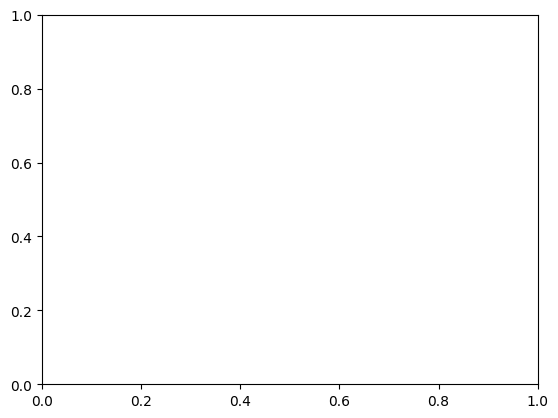

In [57]:
import time
import matplotlib.pyplot as plt

from gdx import (
    gdx,
)  # The gdx function calls are from a gdx.py file inside the gdx folder, which must be with this program.

gdx = gdx.gdx()


fig, ax = plt.subplots()

# CHANGE TO MATCH YOUR EXPERIMENT
time_between_readings_in_seconds = 0.5
number_of_readings = 20
digits_of_precision = 2

gdx.open(connection="usb")  # Use connection='ble' for a Bluetooth connection
# gdx.open(connection='usb', device_to_open='GDX-FOR 071000U9')  # You can also use an argument to specify the device

In [58]:
gdx.select_sensors()  # You will be asked to select the sensors to be used. You can select up to three.
# gdx.select_sensors([1]) # You can also use an argument to select sensors. Separate multiple sensors with a comma, ([1,3])



List of sensors for GDX-RB 0K5009F0 USB 
1: Force (N)
2: Respiration Rate (bpm)
4: Steps (steps)
5: Step Rate (spm)


- If connecting a single sensor, type the number (e.g., 1) that
corresponds with the sensor, and then press 'enter'.
- If connecting multiple sensors, type in each number
separated with commas with no spaces(e.g., 1,2), and then 
click 'enter': 

In [59]:
# This gets the name and units of the sensors selected.
column_headers = gdx.enabled_sensor_info()

In [60]:
# Store the number of sensors. This variable is used in plot_graph() and print_table()
number_of_sensors = len(column_headers)

In [61]:
unit_list = []
units = ""
for headers in column_headers:
    units = str(headers[headers.find("(") : headers.find(")") + 1])
    unit_list.append(units)

In [62]:
# Save the column_headers as a string, to be used in the title of the graph
column_headers_string = str(column_headers)
column_headers_string = column_headers_string.replace("'", "")
column_headers_string = column_headers_string.replace("[", "")
column_headers_string = column_headers_string.replace("]", "")

In [63]:
# Variables to store the time and readings from the sensors
sensor_times = []
sensor_readings0 = []
sensor_readings1 = []
sensor_readings2 = []
print_table_string = []

In [65]:
plt.pause(1)

In [66]:
period_in_ms = time_between_readings_in_seconds * 1000

In [67]:
# Start data collection at the specified rate. The period argument is in milliseconds
gdx.start(period_in_ms)

In [68]:
def plot_graph():

    # Customize the graph See Pyplot documentation
    ax.plot(
        sensor_times, sensor_readings0, color="r", label=column_headers[0]
    )  # red line for sensor 1

    # sensor_times and sensor_readings are variables storing the time and measurements from the data collection loop.
    if number_of_sensors > 1:
        ax.plot(
            sensor_times, sensor_readings1, color="b", label=column_headers[1]
        )  # blue line for sensor 2
    if number_of_sensors > 2:
        ax.plot(
            sensor_times, sensor_readings2, color="k", label=column_headers[2]
        )  # black line for sensor 3

    plt.ylabel(column_headers_string)  # name and units of the sensor selected#
    plt.xlabel("Time(s)")
    plt.grid(True)  # This controls whether there is a grid on the graph
    plt.pause(0.05)  # display the graph briefly, as the readings are taken

In [69]:
def print_table():
    print("Data Table:")
    print(
        "Time (s) ", column_headers_string
    )  # label the data table that will be printed on the Python Shell

    # The print_table_string is a list of strings. Each element in the list contains the time and readings.
    # This variable is created in the Data Collection loop.
    for string in print_table_string:
        print(string)

In [73]:
collection_complete = False
while not collection_complete:
    try:
        time_elapsed = 0
        print("Collecting Data...")

        # Print the column headers
        print("Time(s), " + column_headers_string)

        for i in range(0, number_of_readings):
            # Create a list of times
            sensor_times.append(time_elapsed)

            # Read sensor data
            measurements = gdx.read()
            if measurements is None or len(measurements) == 0:
                print("No data received from sensors. Stopping collection.")
                collection_complete = True
                break

            # Process and store data
            d = 0
            data_string = ""
            for data in measurements:
                if d == 0:
                    sensor_readings0.append(data)
                elif d == 1:
                    sensor_readings1.append(data)
                elif d == 2:
                    sensor_readings2.append(data)

                round_data = str(round(data, digits_of_precision))
                data_string += round_data + "   "
                d += 1

            # Print the data
            print(f"{round(time_elapsed, 2)}   {data_string}")

            # Update the time variable
            time_elapsed += time_between_readings_in_seconds

        print("Data collection complete")
        print("Number of readings:", i + 1)
        print("Time between readings:", time_between_readings_in_seconds, "s")
        print("Total time for data collection:", time_elapsed, "s")

        # Stop and disconnect
        gdx.stop()
        gdx.close()

    except KeyboardInterrupt:
        collection_complete = True
        gdx.stop()
        gdx.close()
        print("Data collection stopped by keypress.")
        print("Number of readings:", i + 1)

Time(s), Force (N)


IndexError: pop from empty list

In [1]:
from godirect import GoDirect

# Initialize GoDirect
godirect = GoDirect()

# Get the device
device = godirect.get_device()

if device is not None and device.open(auto_start=True):
    # 센서 ID를 가져오고 활성화
    sensor_ids = device.sensors  # 사용 가능한 센서 ID 가져오기
    device.enable_sensors(sensor_ids)  # 모든 센서 활성화

    # 활성화된 센서 가져오기
    sensors = device.get_enabled_sensors()
    print("Connected to " + device.name)
    print("Enabled sensors:", [sensor.sensor_description for sensor in sensors])

Connected to GDX-RB 0K5009F0
Enabled sensors: ['Force']


In [2]:
# 측정하고 싶은 센서와 샘플릭 속도 선택 #1번센서가 Force, 명상호흡데이터라서 샘플링 속도 500 설정
gdx.select_sensors()
gdx.start()
column_headers = gdx.enabled_sensor_info()
print("\n")
print(column_headers)

NameError: name 'gdx' is not defined

In [ ]:
from godirect import GoDirect
import time
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import threading
import queue

In [ ]:
# Step 1: 실시간 데이터를 저장할 큐 생성
data_queue = queue.Queue()

In [ ]:
# Step 2: GoDirect 초기화
godirect = GoDirect()

In [ ]:
# Step 3: 장치 연결
device = godirect.get_device()

In [ ]:
if device is not None and device.open(auto_start=True):
    sensors = device.get_enabled_sensors()
    print("Connected to " + device.name)
    print("Collecting data for 300 seconds...")

    # 실시간 데이터를 읽어오는 쓰레드
    def collect_data():
        start_time = time.time()
        duration = 300  # 수집 시간 (초)
        while time.time() - start_time < duration:
            if device.read():
                for sensor in sensors:
                    if sensor.sensor_description == "Force":  # Force 데이터만 사용
                        force_value = sensor.values[0]  # 첫 번째 값을 가져옴
                        data_queue.put(force_value)  # 큐에 추가
                        print(f"Force: {force_value}")  # 콘솔 출력
                    sensor.clear()
            time.sleep(0.1)  # CPU 부하 줄이기
        device.stop()
        device.close()
        godirect.quit()

    # Step 4: 실시간 시각화 설정
    x_data, y_data = [], []

    def update(frame):
        while not data_queue.empty():  # 큐에서 새 데이터를 가져옴
            new_data = data_queue.get()
            x_data.append(time.time())  # 시간 데이터를 x축으로 사용
            y_data.append(new_data)  # Force 데이터를 y축으로 사용

            # 최신 100개의 데이터만 유지 (화면 깔끔하게 유지)
            if len(x_data) > 100:
                x_data.pop(0)
                y_data.pop(0)

        line.set_data(range(len(y_data)), y_data)  # x_data 대신 index 사용
        ax.relim()  # 축 재설정
        ax.autoscale_view()  # 축 자동 스케일링
        return (line,)

    # Matplotlib 그래프 설정
    fig, ax = plt.subplots()
    (line,) = ax.plot([], [], lw=2, label="Force (N)")  # 그래프 라벨
    ax.legend()
    ax.set_title("Real-Time Force Data")  # 그래프 제목
    ax.set_xlabel("Sample Index")  # x축 라벨
    ax.set_ylabel("Force (N)")  # y축 라벨

    # Step 5: 쓰레드 시작
    thread = threading.Thread(target=collect_data, daemon=True)
    thread.start()

    # Step 6: Matplotlib 애니메이션 시작
    ani = FuncAnimation(fig, update, blit=False, interval=100, cache_frame_data=False)
    plt.show()

else:
    print("Device connection failed.")

In [ ]:
from godirect import GoDirect
import time

# Initialize GoDirect
godirect = GoDirect()

# Get the device
device = godirect.get_device()

if device is not None and device.open(auto_start=True):
    # 모든 센서 활성화
    for sensor in device.sensors:
        sensor.enable()

    sensors = device.get_enabled_sensors()
    print("Connected to " + device.name)
    print("Enabled sensors:", [sensor.sensor_description for sensor in sensors])

    # Start time
    start_time = time.time()
    duration = 300  # seconds

    # Collect data for 300 seconds
    while time.time() - start_time < duration:
        if device.read():
            for sensor in sensors:
                if len(sensor.values) > 0:  # 데이터가 있는 센서만 출력
                    print(sensor.sensor_description + ": " + str(sensor.values))
                else:
                    print(sensor.sensor_description + ": No data")
                sensor.clear()
        time.sleep(0.1)  # Optional: Reduce CPU usage by adding a small delay

    # Stop and close the device
    device.stop()
    device.close()

# Quit GoDirect
godirect.quit()

In [ ]:
from godirect import GoDirect
import time
import csv

# Initialize GoDirect
godirect = GoDirect()

# Get the device
device = godirect.get_device()

if device is not None and device.open(auto_start=True):
    sensors = device.get_enabled_sensors()
    print("Connected to " + device.name)
    print("Collecting data for 300 seconds...")

    # Start time
    start_time = time.time()
    duration = 300  # seconds

    # CSV 파일 열기
    with open("force_data.csv", mode="w", newline="") as csv_file:
        csv_writer = csv.writer(csv_file)

        # 헤더 작성
        csv_writer.writerow(["Timestamp", "Sensor Description", "Value"])

        # Collect data for the specified duration
        while time.time() - start_time < duration:
            if device.read():
                for sensor in sensors:
                    timestamp = time.time()  # 현재 시간 (Unix 타임스탬프)
                    sensor_description = sensor.sensor_description
                    values = sensor.values  # Force 데이터

                    # 데이터가 있으면 파일에 기록
                    if values:
                        csv_writer.writerow([timestamp, sensor_description, values[0]])
                        print(f"{sensor_description}: {values[0]}")  # 콘솔 출력

                    sensor.clear()  # 버퍼 정리
            time.sleep(0.1)  # CPU 부하 줄이기

    # Stop and close the device
    device.stop()
    device.close()

# Quit GoDirect
godirect.quit()